### Introduction to Machine Learning with Python
## Chapter 7. 텍스트 데이터 다루기
---
## IMDb 리뷰 다루기

- 데이터 전체 :  말뭉치 (corpus)
- 샘플 하나 : 문서 (document)
- 자연어 처리 : NLP(Natural language processing)
- 한국어는 하나의 **어절**이 여러 개의 의미 단위로 구성되는 경우가 있으므로 **형태소 분석**을 해야 한다

- IMDb 영화 리뷰 데이터셋 : https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/data/aclImdb_v1.tar.gz
- 압축을 풀어 data/aclImdb 폴더로 옮긴다
> ```
./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg
./data/aclImdb/train/unsup
```

- ./data/aclImdb/train/unsup 폴더를 ./data/aclImdb/train_unsup 폴더로 옮긴다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_files

imdb_train = load_files('data/aclImdb/train/')
imdb_test = load_files('data/aclImdb/test/')

# np.save('imdb.npy',[imdb_train, imdb_test])

In [3]:
# imdb_train, imdb_test = np.load('imdb.npy')

- imdb_train 과 imdb_test 내용 확인

In [6]:
type(imdb_train)

sklearn.utils.Bunch

In [7]:
imdb_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
# DESCR, data, filenames, target, target_names
display(type(imdb_train.data), len(imdb_train.data))     # list
display(imdb_train.filenames)
display(type(imdb_train.target), len(imdb_train.target)) # array
display(imdb_train.target_names)                         # list

list

25000

array(['data/aclImdb/train/pos\\11485_10.txt',
       'data/aclImdb/train/neg\\6802_1.txt',
       'data/aclImdb/train/pos\\7641_10.txt', ...,
       'data/aclImdb/train/neg\\7611_4.txt',
       'data/aclImdb/train/neg\\8470_2.txt',
       'data/aclImdb/train/neg\\1245_2.txt'], dtype='<U35')

numpy.ndarray

25000

['neg', 'pos']

In [10]:
imdb_train.target[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [11]:
imdb_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

- 위의 문장은 타입이 bytes 이다. 그리고 문장 중간에 ```'<br />'``` 이 포함되어 있다.

In [4]:
s = imdb_train.data[6]
s.decode()

"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [12]:
s = imdb_train.data[6]
s.decode().replace('<br />', '') # s.replace(b'<br />', b'') 로 변환하면 출력 타입이 bytes 이다

"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [5]:
text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
len(text_train)

25000

In [6]:
y_train = imdb_train.target
display(y_train.shape, y_train)

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [8]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

- load_files() 함수는 폴더 이름을 알파벳 순서로 읽기 때문에, 'neg' 폴더는 0, 'pos' 폴더는 1 로 타겟값이 지정된다.
- imdb_train.target_names 값의 순서이기도 하다.

- 테스트 파일을 분석하자

In [15]:
display(type(imdb_test.data), len(imdb_test.data))     # list
display(imdb_test.filenames)
display(type(imdb_test.target), len(imdb_test.target)) # array
display(imdb_test.target_names)                         # list

list

25000

array(['data/aclImdb/test/pos\\11485_9.txt',
       'data/aclImdb/test/neg\\6802_1.txt',
       'data/aclImdb/test/pos\\7641_8.txt', ...,
       'data/aclImdb/test/neg\\7611_2.txt',
       'data/aclImdb/test/neg\\8470_1.txt',
       'data/aclImdb/test/neg\\1245_2.txt'], dtype='<U34')

numpy.ndarray

25000

['neg', 'pos']

In [9]:
text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
display(len(text_test))

y_test = imdb_test.target
display(y_test.shape, y_test)

25000

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [10]:
np.bincount(y_test)

array([12500, 12500], dtype=int64)

> **정리**
> - text_train => list, 25000
> - y_train => array, 25000
> - text_test => list, 25000
> - y_test => array, 25000

### BOW (Bag Of Words)
전체 텍스트 데이터에서 단어집을 만드는 방법
- CountVectorizer
- TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

ss = ['I am Tom. Tom is me!', 'He is Tom. He is a man.']
vect = CountVectorizer()
vect.fit(ss)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
vect.vocabulary_ # 한 글자 단어와 구두점은 제외한다

{'am': 0, 'tom': 5, 'is': 2, 'me': 4, 'he': 1, 'man': 3}

In [23]:
voca = vect.vocabulary_
sorted([(v,k) for k,v in voca.items()])

[(0, 'am'), (1, 'he'), (2, 'is'), (3, 'man'), (4, 'me'), (5, 'tom')]

In [24]:
vect.transform(ss)

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [26]:
vect.transform(ss).toarray()

array([[1, 0, 1, 0, 1, 2],
       [0, 2, 2, 1, 0, 1]], dtype=int64)

- IMDB 데이터의 BOW 생성

In [16]:
vect = CountVectorizer()
vect.fit(text_train) # 단어집이 만들어진다
X_train = vect.transform(text_train) # sparse matrix

In [28]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 75911)

In [29]:
X_train

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>

In [30]:
i=0
for v in vect.vocabulary_:
    print(v, vect.vocabulary_[v])
    i+=1
    if i==10: break

zero 75669
day 16986
leads 38653
you 75381
to 68091
think 67468
even 23059
re 54503
why 73998
two 69757


In [32]:
feature_names = vect.get_feature_names()
display(type(feature_names), len(feature_names))
display(feature_names[:5], feature_names[20010:20015], feature_names[::10000], feature_names[-5:])

list

75911

['00', '000', '0000000000001', '00001', '00015']

['doppelgangers', 'doppelgänger', 'dopplebangers', 'doppleganger', 'doppler']

['00',
 'burress',
 'dop',
 'hallucinogenics',
 'looping',
 'periphery',
 'shaffer',
 'una']

['ís', 'ísnt', 'østbye', 'über', 'üvegtigris']

In [34]:
for i in range(10):
    # a = X_train[i].toarray()
    a = X_train[i]
    print('%4d %s' % ((a > 0).sum(), a.shape))

  91 (1, 75911)
 120 (1, 75911)
  62 (1, 75911)
  95 (1, 75911)
 166 (1, 75911)
  47 (1, 75911)
  78 (1, 75911)
 151 (1, 75911)
 220 (1, 75911)
  43 (1, 75911)


### 분류 모델 적용
- LogisticRegression 과 교차검증 적용 (학습데이터만 사용함)
- LogisticRegression 의 설정값인 C 를 바꿔가면서 적용해야 한다.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [37]:
scores = cross_val_score(LogisticRegression(C=1), X_train, y_train) # default cv=3
scores

array([0.87724982, 0.87365011, 0.87650024])

- 테스트세트를 적용하여 점수 확인
- C 값으로 0.1 을 적용한다
> **주의** : text_train 으로 단어집을 만들었으므로 text_test 에는 단어집에 없는 단어가 있을 수 있다

In [17]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
X_test = vect.transform(text_test)

In [19]:
score = model.score(X_test, y_test)
score

0.87884

In [20]:
model.score(X_train, y_train)

0.97504

- Naive Bayes 적용

In [22]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BernoulliNB(), X_train, y_train)
scores

array([0.84809215, 0.84473242, 0.85441671])

- SVM 을 적용하면 시간이 아주 오래 걸린다. 결과만 참고하자.

In [33]:
'''from sklearn.svm import SVC

scores = cross_val_score(SVC(), X_train, y_train)
scores'''

array([0.71358291, 0.70230382, 0.71915506])

### 속성(단어) 줄이기
- CountVectorizer 의 min_df=5 로 설정 (5개 이하로 문서에 나타나는 단어는 제외)
- 특성의 갯수가 줄어서 처리 속도가 빨라짐

In [45]:
vect_5 = CountVectorizer(min_df=5)
vect_5.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [52]:
len(vect.vocabulary_), len(vect_5.vocabulary_) # 75911 => 27264

(75911, 27264)

In [53]:
X_train_5 = vect_5.transform(text_train)

In [54]:
scores = cross_val_score(LogisticRegression(), X_train_5, y_train)
scores

array([0.87520998, 0.87149028, 0.87554009])

In [55]:
scores = cross_val_score(BernoulliNB(), X_train_5, y_train)
scores

array([0.84701224, 0.84521238, 0.85345655])

### 불용어 적용
- CountVectorizer(stop_words='english', max_df=...)
- stop_words : 불용어 목록을 지정함
- max_df : 너무 자주 나타나는 단어를 제외함

### Tf-idf 적용
- 단어빈도-역문서빈도(tf-idf) 적용
- 한 문서에서 특정 단어가 다른 문서에서 보다 많이 나타날 때 가중치를 높게 주는 방식이다
- CountVectorizer 호출 후 TfidfTransformer 적용, 또는 바로 TfidfVectorizer 적용
> $ tfidf(w,d) = tf \cdot (log({{N+1} \over {N_w+1}}) +1) $
>> 해당 문서 d 에 해당 단어 w 가 tf 횟수만큼 나타난  경우<br>
>> $N$ 은 전체 문서 갯수, $N_w$ 는 해당 단어 w 가 나타난 문서 갯수

- $tf$ 가 높을 수록 $N_w$ 가 낮을 수록 가중치가 높아진다 (즉, 이 문서에서는 자주 나타나지만 다른 문서에서는 자주 나타나지 않는 단어에 가중치를 준다)

- 스케일 변경 후 각 문서(행)의 벡터곱이 1이 되도록 L2 정규화 함

In [56]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train)

In [57]:
(X_train_tfidf[0].toarray()**2).sum() # 정규화 확인

0.9999999999999996

In [58]:
scores = cross_val_score(LogisticRegression(), X_train_tfidf, y_train)
scores

array([0.88396928, 0.88528918, 0.88514162])

In [59]:
scores = cross_val_score(BernoulliNB(), X_train_tfidf, y_train)
scores

array([0.84809215, 0.84473242, 0.85441671])

- 각 열(단어)에서 tf-idf 의 최대값을 찾아, 이 중 가장 큰 값을 가지는 열(단어)를 뽑아내자

In [64]:
words = X_train_tfidf.max(axis=0).toarray().ravel() # shape 가 (1,75911) 이므로 ravel() 적용
indexer = words.argsort()

fn = np.array(vect.get_feature_names())

display(fn[indexer[:20]], fn[indexer[-20:]])

array(['gloated', 'stormmatch', 'clotheslining', 'rollup', 'hardymatch',
       'somersaulted', 'somersaulting', 'turnbuckles', 'brawled',
       'rvdmatch', 'dudleys', 'hurracanrana', 'crossface', 'noblematch',
       'ganged', 'tannouncement', 'riksihi', 'pinfall', 'wassup',
       'chokeslammed'], dtype='<U74')

array(['blah', 'woo', 'lennon', 'sucks', 'bye', 'kibbutz', 'sasquatch',
       'demons', 'zatoichi', 'colombo', 'botched', 'darkman', 'steve',
       'wei', 'doodlebops', 'lupin', 'smallville', 'scanners', 'nr',
       'pokemon'], dtype='<U74')

- idf 값이 낮은 단어 : 전체 문서에 걸쳐 매우 많이 나타나거나 조금씩만 사용되거나 매우 긴 문서에 나타나는 경우
- idf 값이 높은 단어 : 특정 쇼나 영화에 자주 나타나는 단어


- 아래는 여러 문서에 걸쳐 자주 나타나는 단어 목록

In [65]:
fn[np.argsort(tfidf.idf_)[:100]]

array(['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but',
       'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'have', 'one',
       'be', 'film', 'are', 'you', 'all', 'at', 'an', 'by', 'so', 'from',
       'like', 'who', 'they', 'there', 'if', 'his', 'out', 'just',
       'about', 'he', 'or', 'has', 'what', 'some', 'good', 'can', 'more',
       'when', 'time', 'up', 'very', 'even', 'only', 'no', 'would', 'my',
       'see', 'really', 'story', 'which', 'well', 'had', 'me', 'than',
       'much', 'their', 'get', 'were', 'other', 'been', 'do', 'most',
       'don', 'her', 'also', 'into', 'first', 'made', 'how', 'great',
       'because', 'will', 'people', 'make', 'way', 'could', 'we', 'bad',
       'after', 'any', 'too', 'then', 'them', 'she', 'watch', 'think',
       'acting', 'movies', 'seen', 'its', 'him'], dtype='<U74')

### 모델 계수 조사
- 로지스틱회귀 에서 산출된 기울기값(w) 중 가장 크거나 작은 값을 조사한다

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5)
vect.fit(text_train)
X_train = vect.transform(text_train)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
w = model.coef_[0]
type(w), w.shape

(numpy.ndarray, (27264,))

In [72]:
fn = np.array(vect.get_feature_names())

In [73]:
indexer = w.argsort()

fn[indexer[:20]] # 큰 음수값들, 즉 부정적인 영향을 끼침

array(['worst', 'bad', 'awful', 'waste', 'boring', 'poor', 'terrible',
       'nothing', 'worse', 'no', 'poorly', 'horrible', 'dull',
       'unfortunately', 'annoying', 'script', 'stupid', 'ridiculous',
       'disappointment', 'fails'], dtype='<U20')

In [74]:
fn[indexer[-1:-20:-1]] # 큰 양수값들, 즉 긍정적인 영향을 끼침

array(['great', 'excellent', 'best', 'perfect', 'wonderful', 'amazing',
       'well', 'loved', 'favorite', 'today', 'fun', 'love', 'enjoyed',
       'highly', 'brilliant', 'superb', 'it', 'definitely', 'and'],
      dtype='<U20')

In [75]:
np.r_[indexer[:20], indexer[-20:]]

array([26966,  1970,  1896, 26422,  2968, 18363, 24272, 16630, 26958,
       16534, 18366, 11754,  7621, 25523,  1238, 21273, 23420, 20409,
        6927,  8875, 23154,  1145,  6370, 12982, 23632,  3220, 11491,
        8204, 14484,  9915, 24638,  9034, 14488, 26565,  1034, 26899,
       17789,  2485,  8576, 10641], dtype=int64)

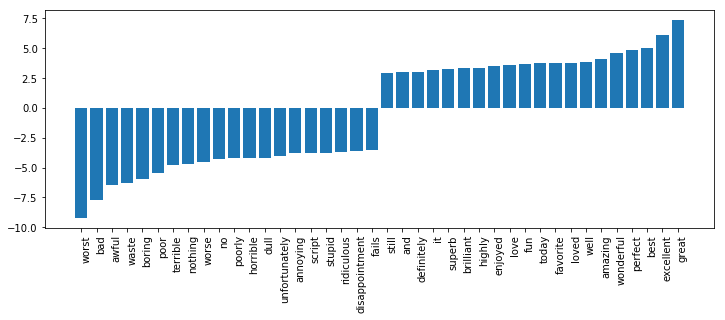

In [76]:
plt.figure(figsize=[12,4])
plt.bar(range(40),w[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), np.r_[fn[indexer[:20]], fn[indexer[-20:]]], rotation=90, ha='left')
print('')